In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [128]:
df=pd.read_csv("Flight_ticket_Train.csv")
df.shape

(10683, 11)

In [129]:
df_test=pd.read_csv("Flight_Ticket_test.csv")
df_test.shape

(2671, 10)

In [130]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [131]:
df_main=df.append(df_test)

In [132]:
df_main.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [133]:
df_main["Route"].value_counts()

DEL ? BOM ? COK          3000
BLR ? DEL                1941
CCU ? BOM ? BLR          1232
CCU ? BLR                 896
BOM ? HYD                 785
                         ... 
CCU ? IXZ ? MAA ? BLR       1
CCU ? VTZ ? BLR             1
BOM ? VGA ? TIR ? HYD       1
BOM ? IXC ? DEL ? HYD       1
BOM ? COK ? MAA ? HYD       1
Name: Route, Length: 132, dtype: int64

In [134]:
df_main.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

route and additional info are providing same information so route column can be dropped 

In [135]:
df_main["Additional_Info"].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

additional info has no much info for all the clumns so can be dropped

In [136]:
df_main = df_main.drop(df_main[['Additional_Info','Route']], axis=1)

In [137]:
df_main.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.0


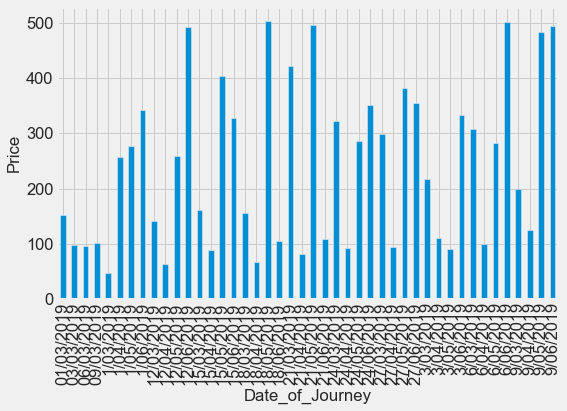

In [138]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df_main.groupby('Date_of_Journey').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

In [139]:
df_main['Date_of_Journey']=pd.to_datetime(df_main['Date_of_Journey'])
df_main['Month_Journey']=df_main['Date_of_Journey'].apply(lambda x:x.month)
df_main['Day_Journey']=df_main['Date_of_Journey'].apply(lambda x:x.day)
df_main['Year_Journey']=df_main['Date_of_Journey'].apply(lambda x:x.year)

In [140]:
df_main = df_main.drop(df_main[['Date_of_Journey']], axis=1)

In [141]:
df_main.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'Month_Journey', 'Day_Journey',
       'Year_Journey'],
      dtype='object')

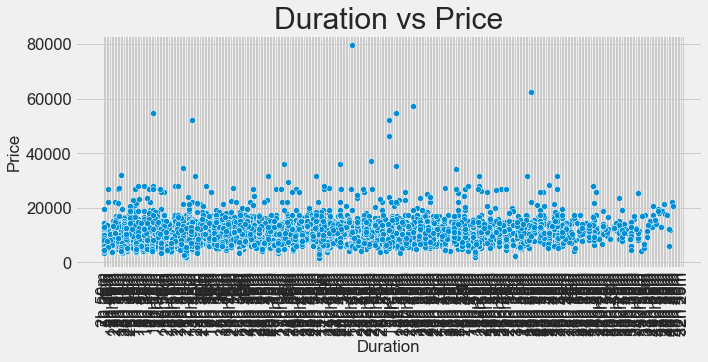

In [142]:
plt.figure(figsize=(10,4))
sns.scatterplot(df_main['Duration'], df_main['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [143]:
df_main["Dep_hour"] = pd.to_datetime(df_main["Dep_Time"]).dt.hour

df_main["Dep_min"] = pd.to_datetime(df_main["Dep_Time"]).dt.minute

df_main.drop(["Dep_Time"], axis = 1, inplace = True)

In [144]:
df_main["Arrival_hour"] = pd.to_datetime(df_main["Arrival_Time"]).dt.hour

df_main["Arrival_min"] = pd.to_datetime(df_main["Arrival_Time"]).dt.minute

df_main.drop(["Arrival_Time"], axis = 1, inplace = True)

department time and arrival time is seprated in to 4 columns

In [145]:
duration = list(df_main["Duration"])

In [146]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]        

In [147]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [148]:
df_main["Duration_hours"] = duration_hours
df_main["Duration_mins"] = duration_mins

seprated the hours and mins rom the duraton column and added the columns in the dataset

In [149]:
df_main.drop(["Duration"], axis = 1, inplace = True)

In [150]:
df_main.head()

,Airline,Source,Destination,Total_Stops,Price,Month_Journey,Day_Journey,Year_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662.0,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,1,3,2019,16,50,21,35,4,45


In [151]:
df_main.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          1
Price             2671
Month_Journey        0
Day_Journey          0
Year_Journey         0
Dep_hour             0
Dep_min              0
Arrival_hour         0
Arrival_min          0
Duration_hours       0
Duration_mins        0
dtype: int64

In [152]:
df_main["Total_Stops"].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [153]:
df.shape

(10683, 11)

In [154]:
df_test.shape

(2671, 10)

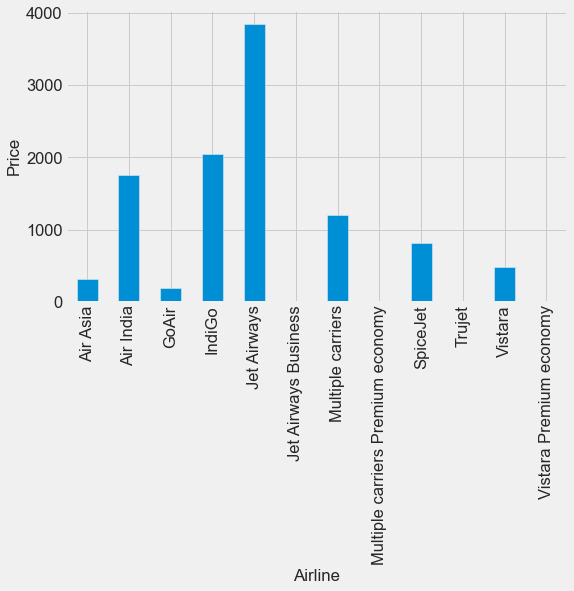

In [155]:
#bivariate analysis
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df.groupby('Airline').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

In [156]:
df_main.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Month_Journey', 'Day_Journey', 'Year_Journey', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

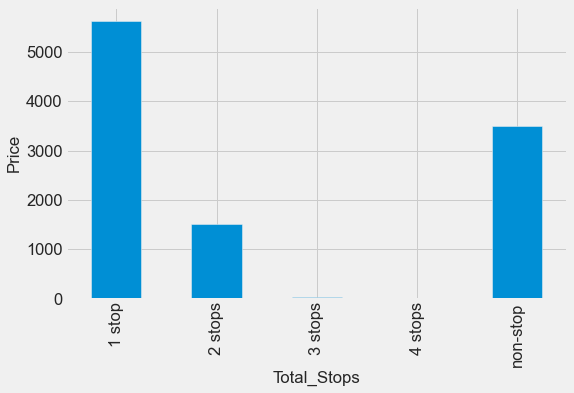

In [157]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df_main.groupby('Total_Stops').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

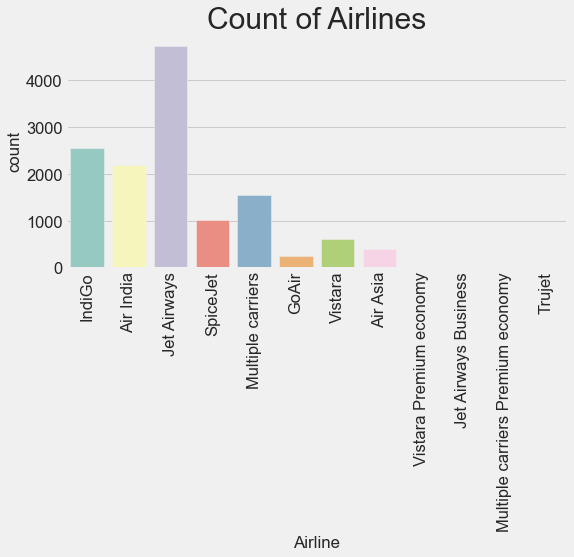

In [158]:
plt.figure(figsize=(8,4))
sns.countplot(df_main['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

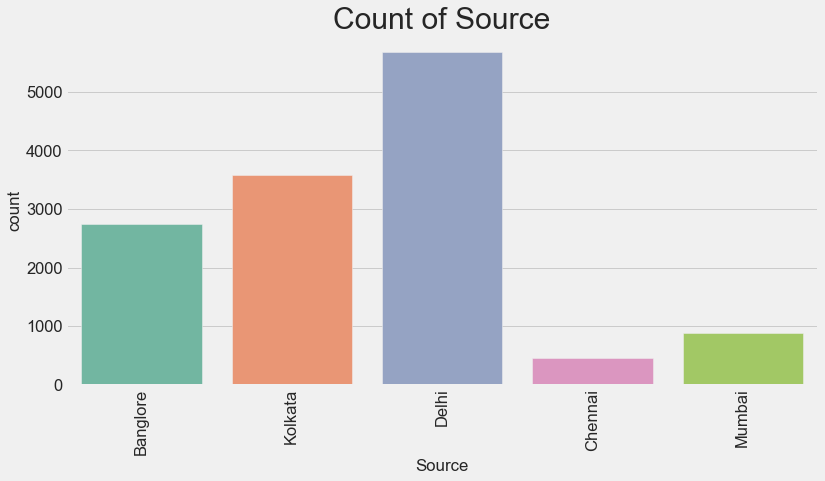

In [159]:
plt.figure(figsize=(12,6))
sns.countplot(df_main['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

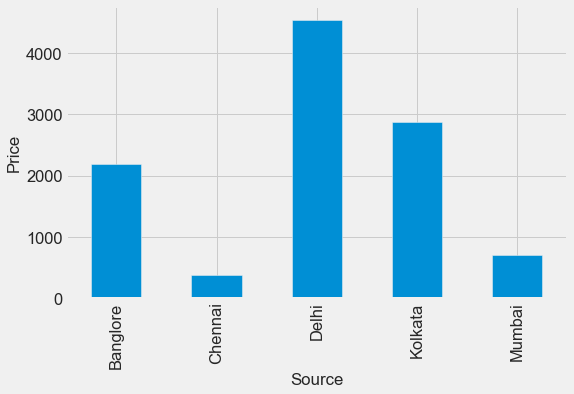

In [160]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df_main.groupby('Source').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

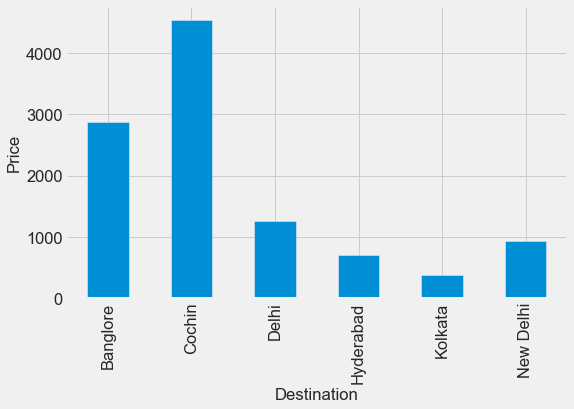

In [161]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5))
ax = df_main.groupby('Destination').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

In [162]:
df_main.head()

,Airline,Source,Destination,Total_Stops,Price,Month_Journey,Day_Journey,Year_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662.0,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,1,3,2019,16,50,21,35,4,45


In [163]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         13354 non-null  object 
 1   Source          13354 non-null  object 
 2   Destination     13354 non-null  object 
 3   Total_Stops     13353 non-null  object 
 4   Price           10683 non-null  float64
 5   Month_Journey   13354 non-null  int64  
 6   Day_Journey     13354 non-null  int64  
 7   Year_Journey    13354 non-null  int64  
 8   Dep_hour        13354 non-null  int64  
 9   Dep_min         13354 non-null  int64  
 10  Arrival_hour    13354 non-null  int64  
 11  Arrival_min     13354 non-null  int64  
 12  Duration_hours  13354 non-null  int64  
 13  Duration_mins   13354 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 1.8+ MB


In [164]:
columns=df_main.select_dtypes(include=['object']).columns

In [165]:
columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops'], dtype='object')

In [166]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [167]:
for i in columns:
    df_main[i] =LE.fit_transform(df_main[i])

In [168]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         13354 non-null  int32  
 1   Source          13354 non-null  int32  
 2   Destination     13354 non-null  int32  
 3   Total_Stops     13354 non-null  int32  
 4   Price           10683 non-null  float64
 5   Month_Journey   13354 non-null  int64  
 6   Day_Journey     13354 non-null  int64  
 7   Year_Journey    13354 non-null  int64  
 8   Dep_hour        13354 non-null  int64  
 9   Dep_min         13354 non-null  int64  
 10  Arrival_hour    13354 non-null  int64  
 11  Arrival_min     13354 non-null  int64  
 12  Duration_hours  13354 non-null  int64  
 13  Duration_mins   13354 non-null  int64  
dtypes: float64(1), int32(4), int64(9)
memory usage: 1.6 MB


Label Encoding has been applied on all the columns and now there is no null values except the price and also all the columns are in int or float datatype

In [169]:
df_main.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Price             2671
Month_Journey        0
Day_Journey          0
Year_Journey         0
Dep_hour             0
Dep_min              0
Arrival_hour         0
Arrival_min          0
Duration_hours       0
Duration_mins        0
dtype: int64

In [170]:
df_test1 = df_main[10683:]
df_train1 = df_main[0:10683]

In [171]:
df_test1.shape

(2671, 14)

In [172]:
df_train1.shape

(10683, 14)

In [173]:
df_test1.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Month_Journey', 'Day_Journey', 'Year_Journey', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [174]:
df_test1["Price"].unique()

array([nan])

In [175]:
df_test1 = df_test1.drop(df_test1[['Price']], axis=1)

dropped the price column in the testing dataset and also seprated the testing and training data

# Working on training data

<AxesSubplot:xlabel='Price', ylabel='Density'>

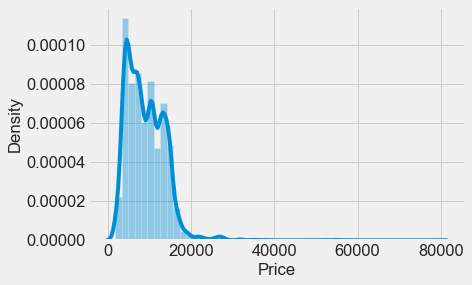

In [176]:
sns.distplot(df_train1["Price"])

<AxesSubplot:>

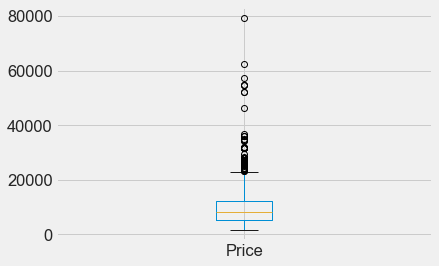

In [177]:
df_train1["Price"].plot.box()

<AxesSubplot:>

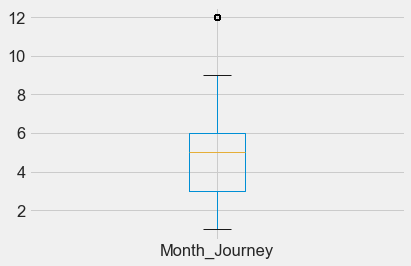

In [178]:
df_train1["Month_Journey"].plot.box()

<AxesSubplot:>

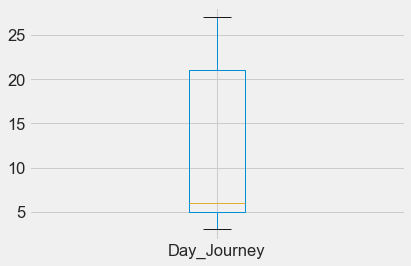

In [179]:
df_train1["Day_Journey"].plot.box()

<AxesSubplot:>

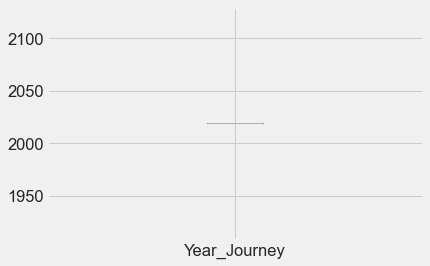

In [180]:
df_train1["Year_Journey"].plot.box()

<AxesSubplot:>

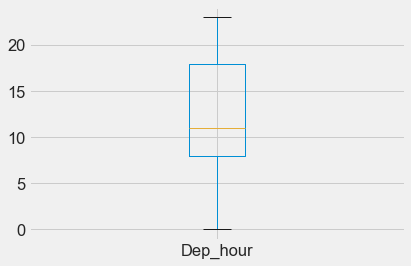

In [181]:
df_train1["Dep_hour"].plot.box()

<AxesSubplot:>

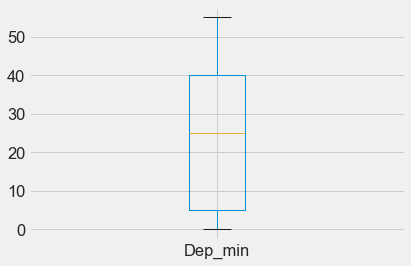

In [182]:
df_train1["Dep_min"].plot.box()

<AxesSubplot:>

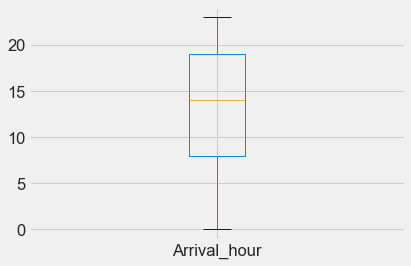

In [183]:
df_train1["Arrival_hour"].plot.box()

<AxesSubplot:>

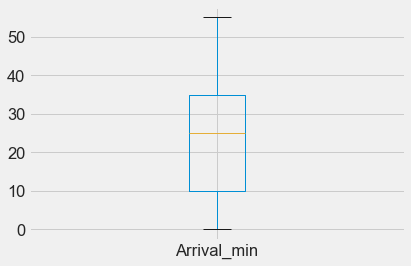

In [184]:
df_train1["Arrival_min"].plot.box()

<AxesSubplot:>

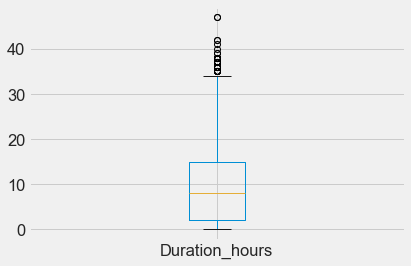

In [185]:
df_train1["Duration_hours"].plot.box()

<AxesSubplot:>

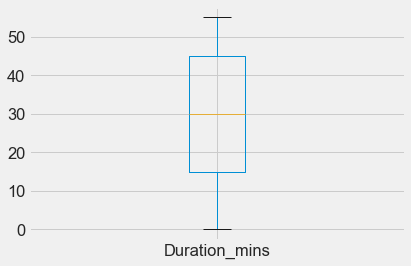

In [186]:
df_train1["Duration_mins"].plot.box()

<AxesSubplot:xlabel='Price'>

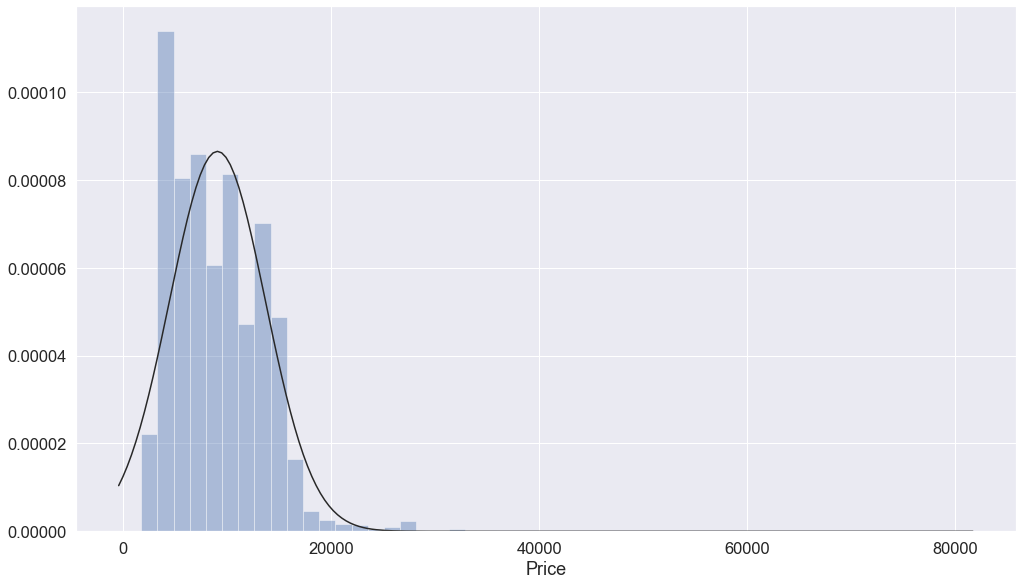

In [187]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_train1.Price, kde=False, fit=norm)

<AxesSubplot:xlabel='Duration_hours'>

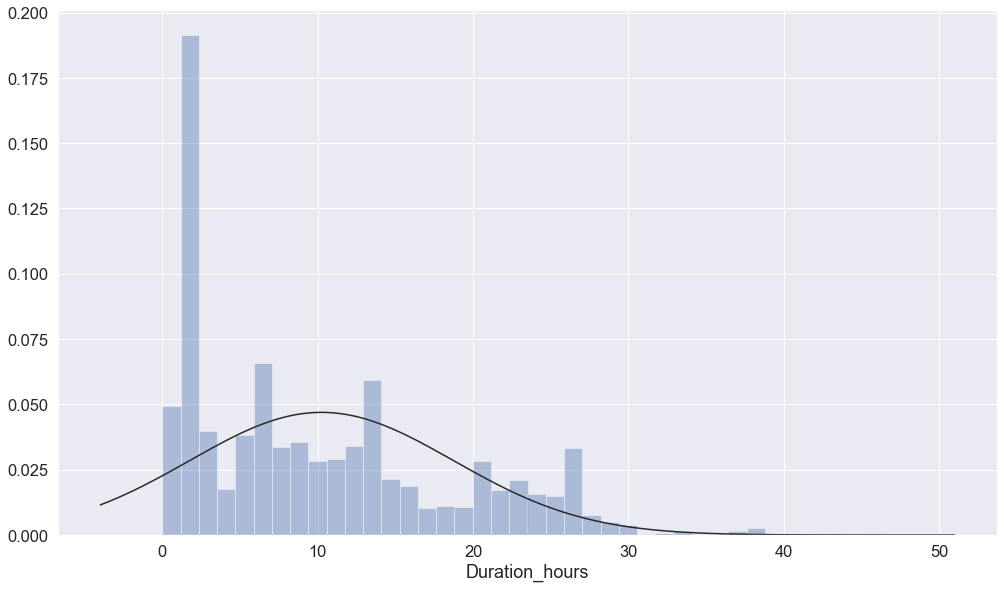

In [188]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_train1.Duration_hours, kde=False, fit=norm)

In [189]:
dfcor=df_train1.corr()

In [190]:
dfcor

,Airline,Source,Destination,Total_Stops,Price,Month_Journey,Day_Journey,Year_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.013401,0.018479,0.035732,-0.039520,-0.007918,0.031218,NaN,-0.035194,-0.060044,-0.007491,-0.071089,-0.158285,-0.028088
Source,-0.013401,1.000000,-0.592574,-0.225557,0.015998,0.063052,0.007560,NaN,0.059044,-0.056991,0.025632,0.021040,0.166109,-0.145187
Destination,0.018479,-0.592574,1.000000,0.337756,-0.071112,-0.105039,-0.052076,NaN,-0.072979,0.127892,-0.039710,0.017196,-0.258459,0.061214
Total_Stops,0.035732,-0.225557,0.337756,1.000000,-0.571179,-0.056475,0.043674,NaN,0.039105,0.049090,-0.095748,0.175952,-0.605688,0.182313
Price,-0.039520,0.015998,-0.071112,-0.571179,1.000000,0.010700,-0.165412,NaN,0.006819,-0.024492,0.024264,-0.086155,0.508672,-0.124874
Month_Journey,-0.007918,0.063052,-0.105039,-0.056475,0.010700,1.000000,-0.264899,NaN,0.028180,0.002152,-0.004338,-0.025786,0.055568,-0.018587
Day_Journey,0.031218,0.007560,-0.052076,0.043674,-0.165412,-0.264899,1.000000,NaN,-0.002251,-0.016521,-0.002124,-0.021424,-0.038081,-0.007764
Year_Journey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hour,-0.035194,0.059044,-0.072979,0.039105,0.006819,0.028180,-0.002251,NaN,1.000000,-0.024806,0.005215,0.067909,0.002783,-0.023746
Dep_min,-0.060044,-0.056991,0.127892,0.049090,-0.024492,0.002152,-0.016521,NaN,-0.024806,1.000000,0.043054,-0.017594,-0.021946,0.092548


In [191]:
df_train1.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Month_Journey     0
Day_Journey       0
Year_Journey      0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
dtype: int64

In [192]:
df_train1["Year_Journey"].value_counts()

2019    10683
Name: Year_Journey, dtype: int64

year of journey column has only one unique value so the column can be dropped
so dropping the value

In [193]:
df_train1 = df_train1.drop(df_train1[["Year_Journey"]], axis=1)

In [194]:
dfcor=df_train1.corr()

In [195]:
dfcor

,Airline,Source,Destination,Total_Stops,Price,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.013401,0.018479,0.035732,-0.039520,-0.007918,0.031218,-0.035194,-0.060044,-0.007491,-0.071089,-0.158285,-0.028088
Source,-0.013401,1.000000,-0.592574,-0.225557,0.015998,0.063052,0.007560,0.059044,-0.056991,0.025632,0.021040,0.166109,-0.145187
Destination,0.018479,-0.592574,1.000000,0.337756,-0.071112,-0.105039,-0.052076,-0.072979,0.127892,-0.039710,0.017196,-0.258459,0.061214
Total_Stops,0.035732,-0.225557,0.337756,1.000000,-0.571179,-0.056475,0.043674,0.039105,0.049090,-0.095748,0.175952,-0.605688,0.182313
Price,-0.039520,0.015998,-0.071112,-0.571179,1.000000,0.010700,-0.165412,0.006819,-0.024492,0.024264,-0.086155,0.508672,-0.124874
Month_Journey,-0.007918,0.063052,-0.105039,-0.056475,0.010700,1.000000,-0.264899,0.028180,0.002152,-0.004338,-0.025786,0.055568,-0.018587
Day_Journey,0.031218,0.007560,-0.052076,0.043674,-0.165412,-0.264899,1.000000,-0.002251,-0.016521,-0.002124,-0.021424,-0.038081,-0.007764
Dep_hour,-0.035194,0.059044,-0.072979,0.039105,0.006819,0.028180,-0.002251,1.000000,-0.024806,0.005215,0.067909,0.002783,-0.023746
Dep_min,-0.060044,-0.056991,0.127892,0.049090,-0.024492,0.002152,-0.016521,-0.024806,1.000000,0.043054,-0.017594,-0.021946,0.092548
Arrival_hour,-0.007491,0.025632,-0.039710,-0.095748,0.024264,-0.004338,-0.002124,0.005215,0.043054,1.000000,-0.154362,0.055180,-0.118345


<AxesSubplot:>

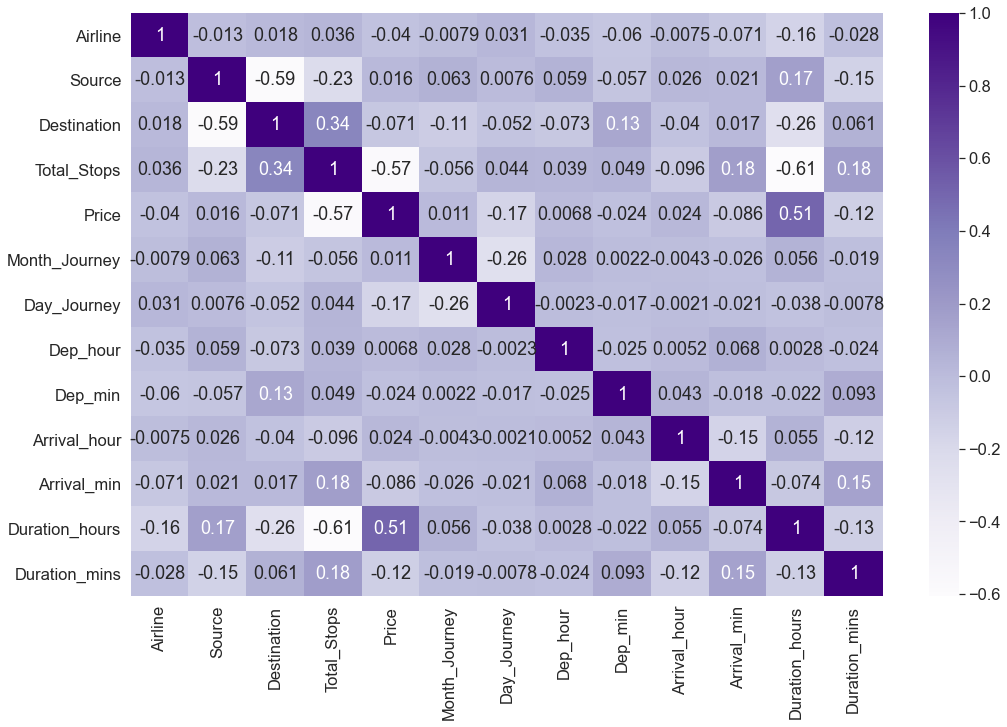

In [196]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap="Purples",annot=True)

In [197]:
#sns.pairplot(df_train1)

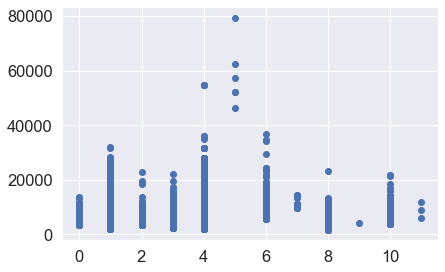

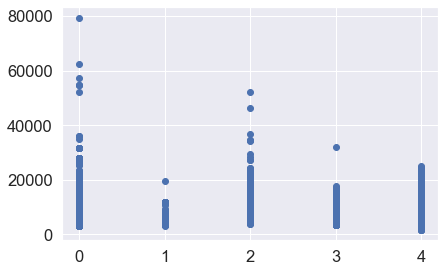

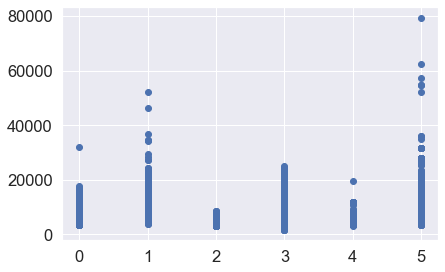

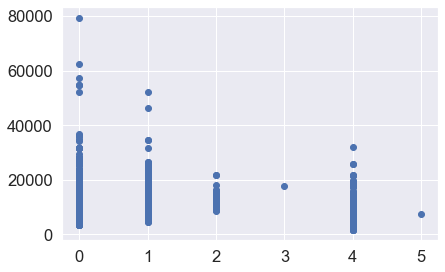

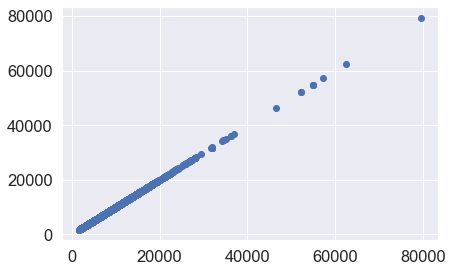

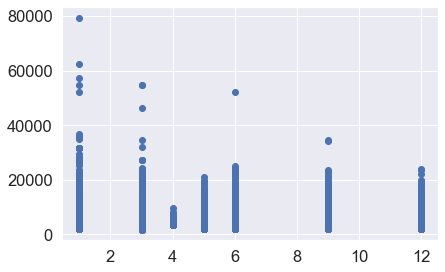

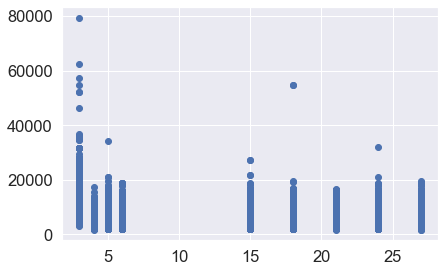

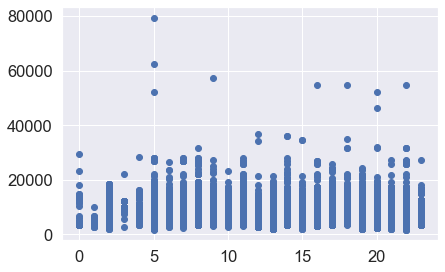

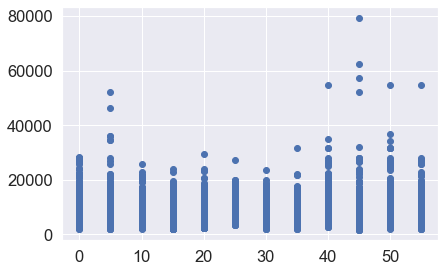

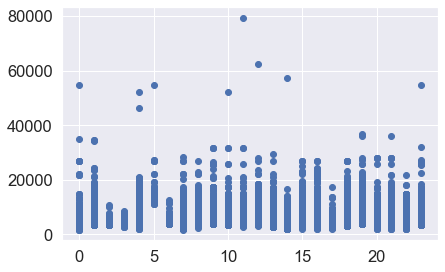

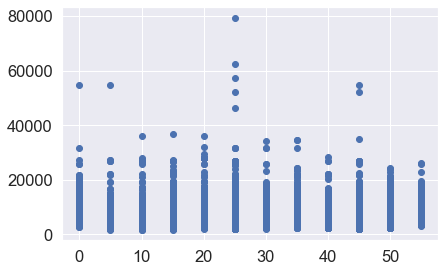

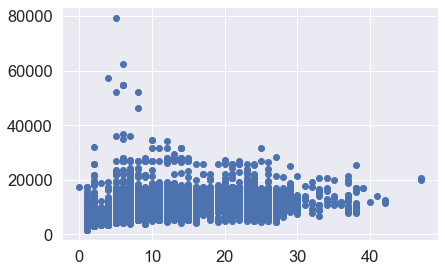

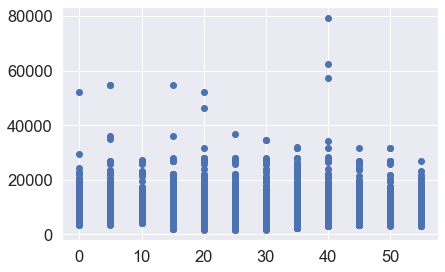

In [198]:
columns=df_train1.columns

for i in columns:
    plt.figure()
    plt.scatter(df_train1[i],df_train1["Price"])

scatter plot with the price column

In [199]:
df_train1.skew()

Airline           0.731095
Source           -0.424054
Destination       1.244169
Total_Stops       0.631375
Price             1.812552
Month_Journey     0.629540
Day_Journey       0.367373
Dep_hour          0.113073
Dep_min           0.167029
Arrival_hour     -0.369988
Arrival_min       0.110945
Duration_hours    0.850862
Duration_mins    -0.090841
dtype: float64

trying to remove the outliers present in Price and Duration_hours through zscore and IQR

In [200]:
from scipy.stats import zscore

In [201]:
df4=df_train1[["Price","Duration_hours"]]
z=np.abs(zscore(df4))
df_new=df_train1[(z<3).all(axis=1)]

In [202]:
print("shape before and after")
print("shape before".ljust(20),":",df_train1.shape)
print("shape after".ljust(20),":",df_new.shape)
print("pecentage loss".ljust(20),":",(df_train1.shape[0]-df_new.shape[0])/df_train1.shape[0])

shape before and after
shape before         : (10683, 13)
shape after          : (10522, 13)
pecentage loss       : 0.015070673031919873


In [203]:
q1=df4.quantile(0.25)
q3=df4.quantile(0.75)
IQR=q3-q1

In [204]:
df_new1=df_train1[~((df4<(q1-1.5*IQR)) |(df4>(q3+1.5*IQR))).any(axis=1)]

In [205]:
print("shape before and after")
print("shape before".ljust(20),":",df_train1.shape)
print("shape after".ljust(20),":",df_new1.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df_train1.shape[0])

shape before and after
shape before         : (10683, 13)
shape after          : (10517, 13)
pecentage loss       : 0.015538706355892539


Same amount of data loss is there with both the method so we will go through the zscore

# Working on testing data

In [206]:
df_test1.shape

(2671, 13)

In [207]:
df_test1["Year_Journey"].unique()

array([2019], dtype=int64)

In [208]:
df_test1 = df_test1.drop(df_test1[["Year_Journey"]], axis=1)

In [209]:
df_test1.shape

(2671, 12)

<AxesSubplot:>

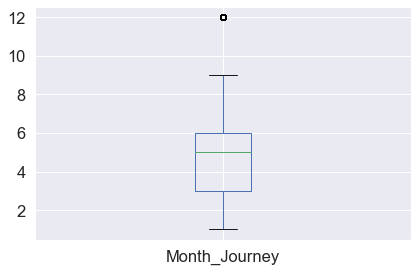

In [210]:
df_test1["Month_Journey"].plot.box()

<AxesSubplot:>

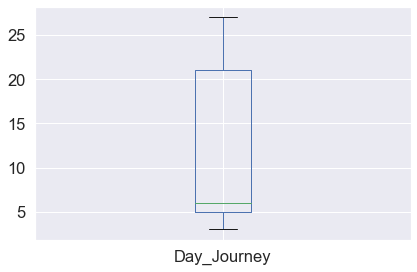

In [211]:
df_test1["Day_Journey"].plot.box()

<AxesSubplot:>

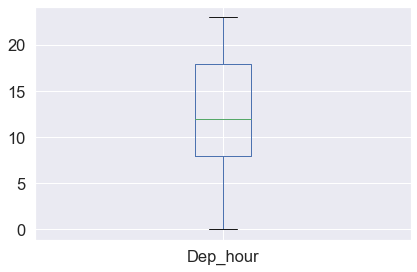

In [212]:
df_test1["Dep_hour"].plot.box()

<AxesSubplot:>

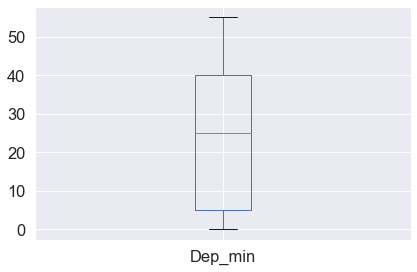

In [213]:
df_train1["Dep_min"].plot.box()

<AxesSubplot:>

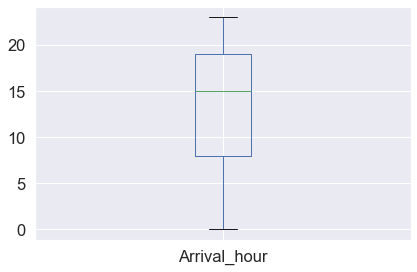

In [214]:
df_test1["Arrival_hour"].plot.box()

<AxesSubplot:>

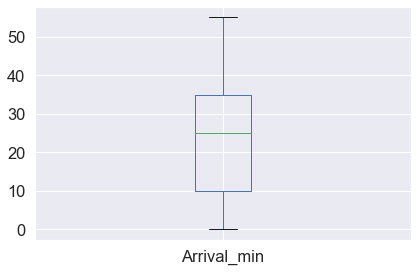

In [215]:
df_test1["Arrival_min"].plot.box()

<AxesSubplot:>

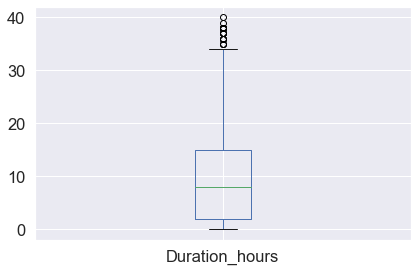

In [216]:
df_test1["Duration_hours"].plot.box()

<AxesSubplot:>

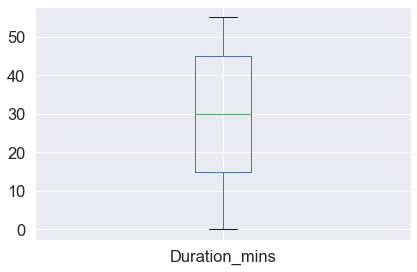

In [217]:
df_test1["Duration_mins"].plot.box()

<AxesSubplot:xlabel='Duration_hours'>

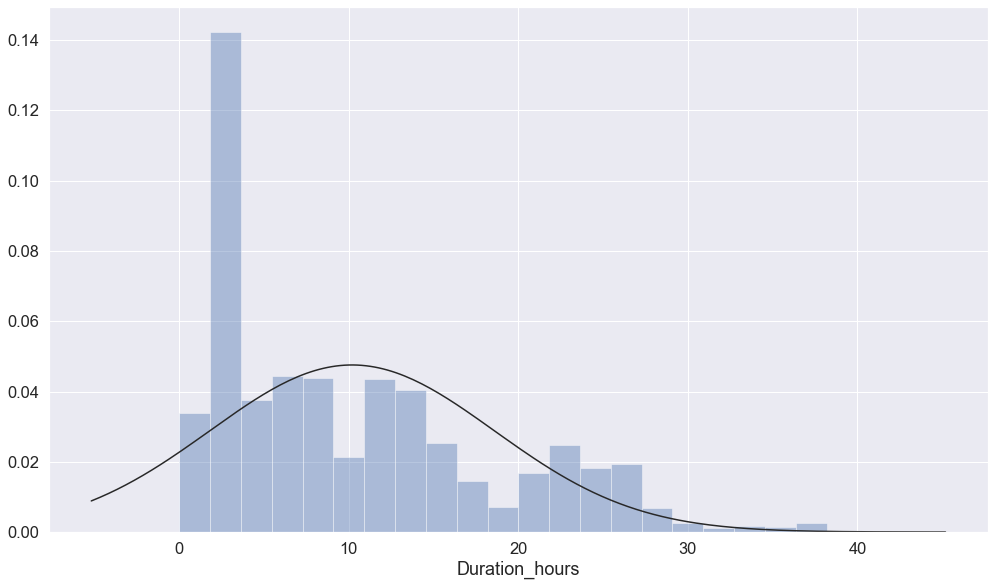

In [218]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_test1.Duration_hours, kde=False, fit=norm)

<AxesSubplot:xlabel='Month_Journey'>

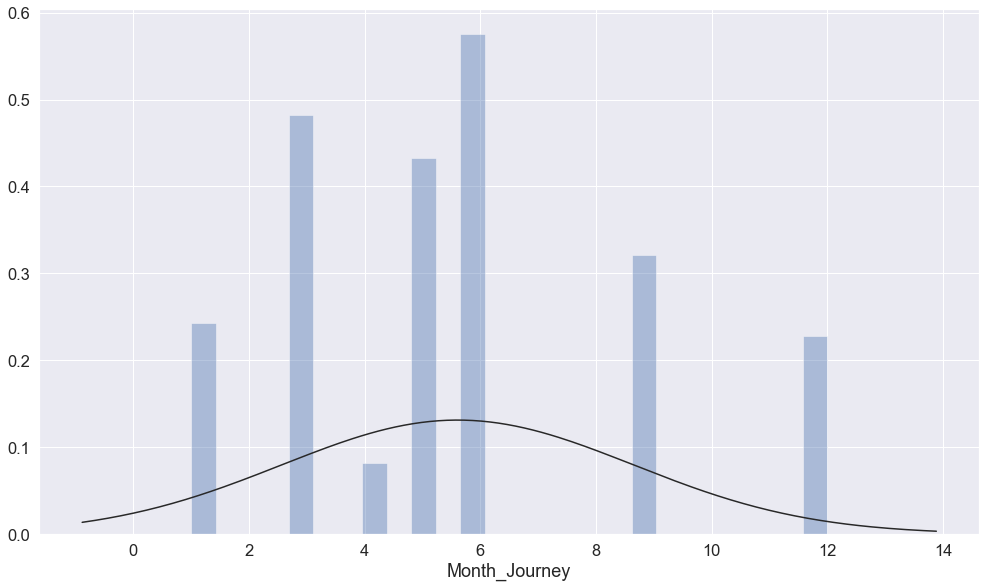

In [219]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df_test1.Month_Journey, kde=False, fit=norm)

In [220]:
dfcor=df_test1.corr()

In [221]:
dfcor

,Airline,Source,Destination,Total_Stops,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.038667,0.036502,0.047194,0.003409,0.004743,0.009261,-0.049805,-0.009752,-0.085059,-0.174253,-0.039445
Source,-0.038667,1.000000,-0.578296,-0.212995,0.050773,-0.026188,0.056065,-0.064886,0.001719,-0.008304,0.153565,-0.141338
Destination,0.036502,-0.578296,1.000000,0.331240,-0.102206,-0.022735,-0.049023,0.153330,-0.004945,0.037196,-0.246831,0.071332
Total_Stops,0.047194,-0.212995,0.331240,1.000000,-0.066047,0.072098,0.072496,0.051715,-0.097218,0.196301,-0.594594,0.172346
Month_Journey,0.003409,0.050773,-0.102206,-0.066047,1.000000,-0.258004,0.007080,0.001781,0.009595,-0.038251,0.091627,-0.026096
Day_Journey,0.004743,-0.026188,-0.022735,0.072098,-0.258004,1.000000,-0.022912,-0.025724,0.015416,-0.010006,-0.059340,0.018906
Dep_hour,0.009261,0.056065,-0.049023,0.072496,0.007080,-0.022912,1.000000,-0.034524,0.000147,0.066751,-0.019739,-0.022836
Dep_min,-0.049805,-0.064886,0.153330,0.051715,0.001781,-0.025724,-0.034524,1.000000,0.046824,-0.020065,0.020907,0.091169
Arrival_hour,-0.009752,0.001719,-0.004945,-0.097218,0.009595,0.015416,0.000147,0.046824,1.000000,-0.136215,0.052277,-0.124326
Arrival_min,-0.085059,-0.008304,0.037196,0.196301,-0.038251,-0.010006,0.066751,-0.020065,-0.136215,1.000000,-0.079484,0.175481


<AxesSubplot:>

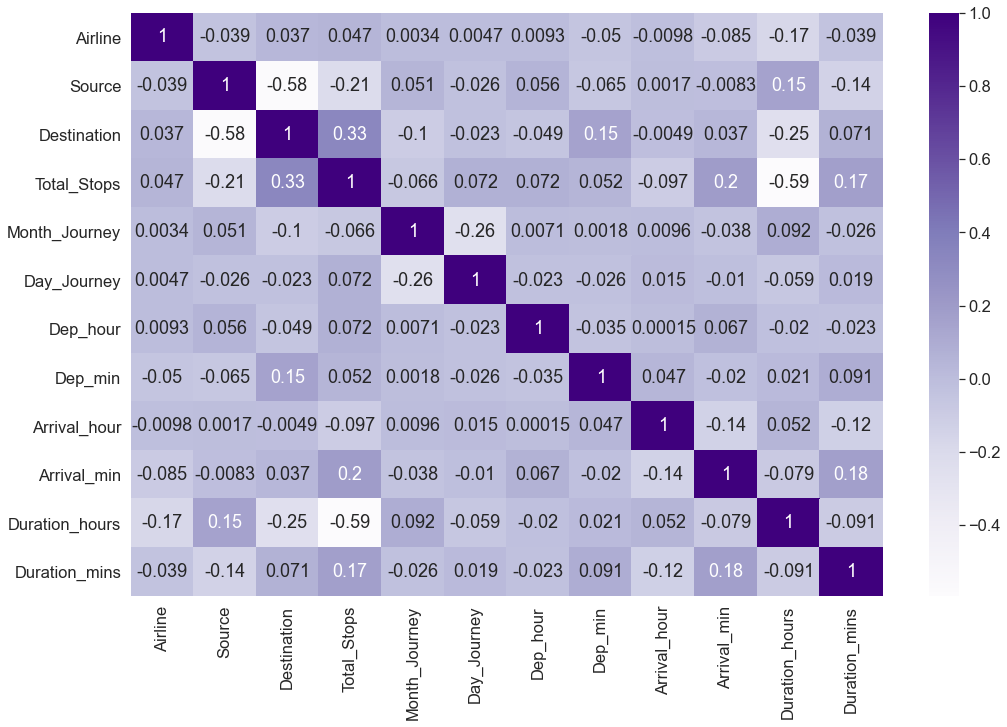

In [222]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap="Purples",annot=True)

In [223]:
#sns.pairplot(df_test1)

In [224]:
df_test1.skew()

Airline           0.680800
Source           -0.424997
Destination       1.263630
Total_Stops       0.672623
Month_Journey     0.590701
Day_Journey       0.478246
Dep_hour          0.093759
Dep_min           0.128515
Arrival_hour     -0.443166
Arrival_min       0.115267
Duration_hours    0.884647
Duration_mins    -0.104482
dtype: float64

In [225]:
from scipy.stats import zscore

In [226]:
df3=df_test1[["Month_Journey","Duration_hours"]]
z=np.abs(zscore(df3))
df_new12=df_test1[(z<3).all(axis=1)]

In [227]:
print("shape before and after")
print("shape before".ljust(20),":",df_test1.shape)
print("shape after".ljust(20),":",df_new12.shape)
print("pecentage loss".ljust(20),":",(df_test1.shape[0]-df_new12.shape[0])/df_test1.shape[0])

shape before and after
shape before         : (2671, 12)
shape after          : (2653, 12)
pecentage loss       : 0.0067390490453013855


In [228]:
q1=df3.quantile(0.25)
q3=df3.quantile(0.75)
IQR=q3-q1

In [229]:
df_new123=df_test1[~((df3<(q1-1.5*IQR)) |(df3>(q3+1.5*IQR))).any(axis=1)]

In [230]:
print("shape before and after")
print("shape before".ljust(20),":",df_test1.shape)
print("shape after".ljust(20),":",df_new123.shape)
print("pecentage loss".ljust(20),":",(df_test1.shape[0]-df_new123.shape[0])/df_test1.shape[0])

shape before and after
shape before         : (2671, 12)
shape after          : (2394, 12)
pecentage loss       : 0.10370647697491576


 df_new12 is the new testing data because less data loss is there so we will go through the zscore

In [231]:
df_new.shape

(10522, 13)

In [232]:
df_new12.shape

(2653, 12)

In [233]:
x=df_new.drop("Price",axis=1)
y=df_new["Price"]

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8417, 12)
(2105, 12)
(8417,)
(2105,)


In [235]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [236]:
y_pred = reg_rf.predict(X_test)

In [237]:
reg_rf.score(X_train, y_train)

0.948960642258856

In [238]:
reg_rf.score(X_test, y_test)

0.8109053506959318

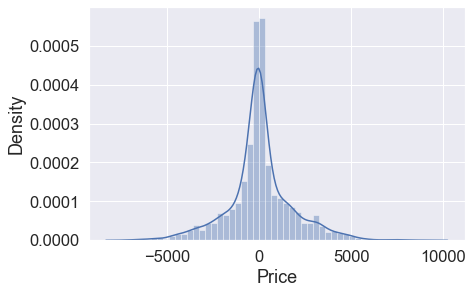

In [239]:
sns.distplot(y_test-y_pred)
plt.show()

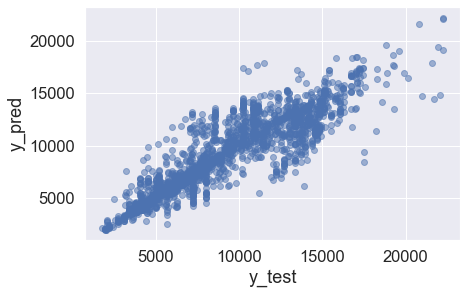

In [240]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [241]:
from sklearn import metrics

In [242]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1165.7729721120131
MSE: 3143922.2182427137
RMSE: 1773.1108871818237


In [243]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.09936550691572794

In [244]:
metrics.r2_score(y_test, y_pred)

0.8109053506959318

WE WILL GO THROUGH THE RANDOM FOREST REGRESSOR as there is 94% accuracy in the model performance

In [245]:
ans = reg_rf.predict(df_new12)

In [246]:
s = pd.Series(ans)
s.values[:10]

array([10518.26      ,  4336.37666667, 14466.249     , 12294.37007143,
        3498.99      , 10591.94      , 11417.68      ,  6535.74      ,
        4447.46      , 13876.48533333])

tested the testing data 

In [247]:
import joblib
joblib.dump(reg_rf,"Flight_Price_Prediction.obj")
print("object of the dataset has been created")

object of the dataset has been created
